# Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow THIRD EDITION Exercises

---

_**Nathan Jones - 05/2023**_

_**My answers to the chapter exercises from this [textbook](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/)**_

---

## Table of Contents
[Chapter 1](#Chapter-1)
* [Reading Notes](#Chapter-1-rn)
* [Exercises](#Chapter-1-ex)

[Chapter 2](#Chapter-2)
* [Reading Notes](#Chapter-2-rn)
* [Exercises](#Chapter-2-ex)

[Chapter 3](#Chapter-3)
* [Reading Notes](#Chapter-3-rn)
* [Exercises](#Chapter-3-ex)

[Chapter 4](#Chapter-4)
* [Reading Notes](#Chapter-4-rn)
* [Exercises](#Chapter-4-ex)

[Chapter 5](#Chapter-5)
* [Reading Notes](#Chapter-5-rn)
* [Exercises](#Chapter-5-ex)

[Chapter 6](#Chapter-6)
* [Reading Notes](#Chapter-6-rn)
* [Exercises](#Chapter-6-ex)

[Chapter 7](#Chapter-7)
* [Reading Notes](#Chapter-7-rn)
* [Exercises](#Chapter-7-ex)

[Chapter 8](#Chapter-8)
* [Reading Notes](#Chapter-8-rn)
* [Exercises](#Chapter-8-ex)

[Chapter 9](#Chapter-9)
* [Reading Notes](#Chapter-9-rn)
* [Exercises](#Chapter-9-ex)

[Chapter 10](#Chapter-10)
* [Reading Notes](#Chapter-10-rn)
* [Exercises](#Chapter-10-ex)

---


<a id='Chapter-1'></a>
## Chapter 1

---

<a id='Chapter-1-rn'></a>
### Reading Notes:

**Question 1:** Why do you perform hyperparameter tuning on the training set only?

**Answer:** If you tune the model to score well on the test set then you are adapting the model and it's hyperparameters to produce the best model for that *particular set of data* (the test set)

**Question 2:** What is **holdout validation** and the **validation (dev) set**?

**Answer:** Holdout validation is when you take a chunk of the training set out and then evaluate several candiate models to select the best one. The chunk you took out is called the **validation** or **dev set**. You would train all of your candidate models on the training set minus the dev set, and then select the model that performed the best on the dev set. Once you have selected a model, you retrain the model on the entire training set (including the dev set you took out), and this becomes your final model. The last step is evaluating the final model on the test set to get an estimate of the generalization error. A more common approach if the data is small enough is to use k-fold CV.

<a id='Chapter-1-ex'></a>
### Exercises

1. Machine Learning is the use of computers and algorithms to gain insights from data without hardcoding rules and using rule base systems.

1. Machine Learning is good for problems without an algorithmic solution, replaces tedious manual work, adapt to changes quicker, and help humans learn.

1. A labeled training set is one where the target variable has known labels.

1. Regression, Classification

1. Clustering, Association, Dimensionality Reduction, Anomaly Detection

1. Reinforcement Learning

1. Clustering

1. Supervised

1. An online learning system is retrained "on the fly", or as new data comes in. It lets you update model parameters and is less computationally expensive than batch learning since you don't retrain the entire model over again, but instead train incrementally.

1. Out of core learning is when you have huge datasets that cannot fit in one machine's main memory. An out of core algorithm chunks the data into mini-batches and uses online learning to learn from the mini-batches

1. Instance Based

1. A model parameter is learned from training on the data (internal). A model hyperparameter is set by the engineer (external) usually through trial and error.

1. Model-based algorithms search for patterns in the data to either minimize a cost function or maximize a utility function. They make predictions by using the mathematical model which minimized the cost function and apply it to new data.

1. Data Quality, Bias, Data Mismatch, Lack of Informative Features

1. Overfitting. You can try a simpler model, regularization, or get more data

1. A test set is a set of data intentionally held out of the modeling process that you can use to estimate generalization error.

1. A validation set is used to find hyperparameter values and evaluate candidate models so you can select the model that performed the best before the final test on the test set.

1. The train-dev set is another partition of the training set you can use to avoid data mismatch (If you think your training data is not similar or representative of the validation / test sets) The train-dev set is not used to train the model, and then the model is evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then you are probably overfitting the train set. If the model performs well on both the train set and the train-dev set, but not the validation set, then you probably have a data mismatch problem and you should improve the training data.

1. You are tuning the model's hyperparamters to that particular test set which can make performance on future unseen data worse. Essentially you might be overfitting the test set. You should use a validation set to find the hyperparameter values.

#### Questions to Revist
5, 10, 11, 12, 14, 18

<a id='Chapter-2'></a>
## Chapter 2

---

<a id='Chapter-2-rn'></a>
### Reading Notes:

**Question 1:** When should you split your data into training and test sets? How is this related to *data snooping* bias?

**Answer:** You should inspect the dataset and look for glaring quality issues, or cast to appropriate data types. 

*Think: `df.head()`, `df.describe()`, `df[col_name].value_counts()`, `df.info()`, `df.hist()`*. 

Don't go much farther than univariate histograms for numeric variables, and value counts for categorical variables. By splitting the data into training and test sets before extensive EDA, you can avoid any potential knowledge from the test data influencing your modeling process. You don't want to consciously or subconsciously overfit your test data as that will give you a more optimistic and less accurate generalization error.

**Question 2:** Why do you need to hash a persistent unique identifier (never changes, new data appended to end, and no row deleted) when splitting your data into training and test sets?

**Answer:** If you didn't use a unique id to determine whether an observation belongs to the training or test set, you / the algorithms would eventually see the entire dataset. The splits are different each time, so you need a way to ensure that you have a stable train/test split after updating the dataset.

**Question 3:** What is stratified sampling? How would you take a stratified sample on a numeric attribute?

**Answer:** Stratified sampling is when you take sample a dataset and ensure that equal proportions of a specific group (*called a strata*) are represented in the sample as are represented in the overall population. For example, if you have biological sex as a predictor with 48% female and 52% male (*assuming this is the overall population proportions*), you can use stratified sampling to ensure you training set and test set have 48% females just like the overall population. To take a stratified sample on a numeric attribute, you can bin the numeric variable (`pd.cut()` or similar) and then perform the sampling as if it were a categorical variable.


**Question 4:** What are the 2 most common ways to scale predictor features? How do they differ?

**Answer:** Normalization (`MinMaxScaler()`) and Standardization (`StandardScaler()`). Normalization takes each value, subtracts the minimum value and divides by the difference between the minimum and maximum value. This rescales all of the values to be in the range $[0, 1]$. Standardization takes each value, subtracts the mean value and divides by the standard deviation. This rescales the data to have mean 0 and a standard deviation of 1.

**In math notation:** given $X$ is a given feature vector, $x_{i}$ is a single observationin $X$, $\bar{X}$ is the sample mean, and $\sigma_{X}$ the sample standard deviation

Normalization = $\frac{x_{i} - Min[X]}{Max[X] - Min[X]}$, for all $x_{i}$ in $X$

Standardization = $\frac{x_{i} - \bar{X}}{\sigma_{X}}$, for all $x_{i}$ in $X$

**Question 5:** What preprocessing technique should be done before scaling if a feature has a heavy tail (when values far from mean are not exponentially rare)?

**Answer:** You should transform the feature before scaling to shrink the heavy tail and make the distribution more symmetrical. Common transformation are square root and logarithms.

Features that are strictly positive and have a heavy right tail generally benefit from square root or raising to a power between 0 and 1. Features with a very long and heavy tail (such as a power law distribution) generally benefit from replacing the feature with its logarithm.

In simpler words, if the feature's values spread out to the right, but not too rapidly, use the square root transformation. If the values spread out significantly and decrease very quickly as they get larger, then the log transformation can be more appropriate.

**Question 6:** Your friend has just trained 2 models - Model 1 without hyperparameter tuning, and Model 2 with hyperparameter tuning. He claims that Model 1 had a lower cross validation `mean_test_score` than Model 2, but Model 2 had a better score on the test data so he decided to proceed with the tuned model. 

What was wrong about his approach and what advice would you give him to fix his error?

**Answer:** You **should never** interact with test set when experimenting with models, and only save it for the very end for the last scoring of your model. You should tell him that he should try some different hyperparameter search spaces (maybe there are better hyperparameter choices than the one he used), or to proceed with the untuned model since it had a better cross validation score.

In [142]:
# Download the housing data
from pathlib import Path 
import pandas as pd 
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz") 
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz" 
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [143]:
# Preview the data
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -122.23     37.88                41.0        880.0           129.0  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [144]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [145]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [146]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms   
count  20640.000000  20640.000000        20640.000000  20640.000000  \
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income   
count    20433.000000  20640.000000  20640.000000   20640.000000  \
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

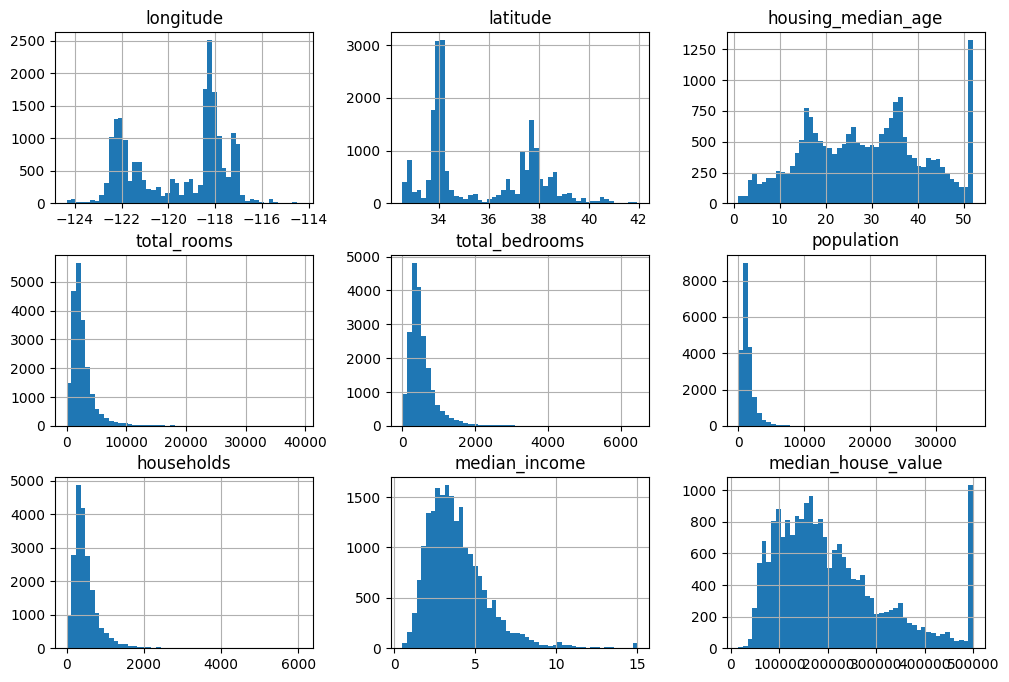

In [147]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))

In [148]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

# Stratified split based on income category
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

# Drop the income_cat attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Make a copy of the training set to perform EDA
housing = strat_train_set.copy()

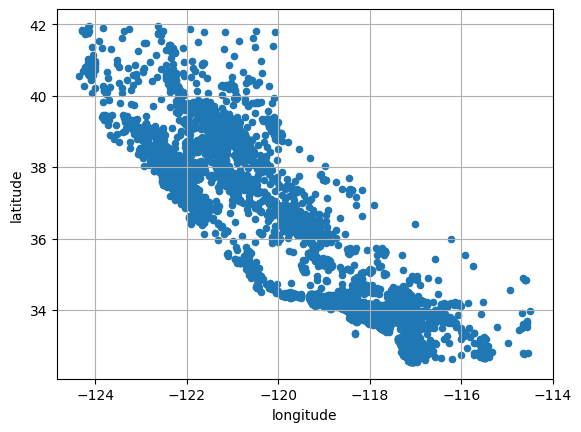

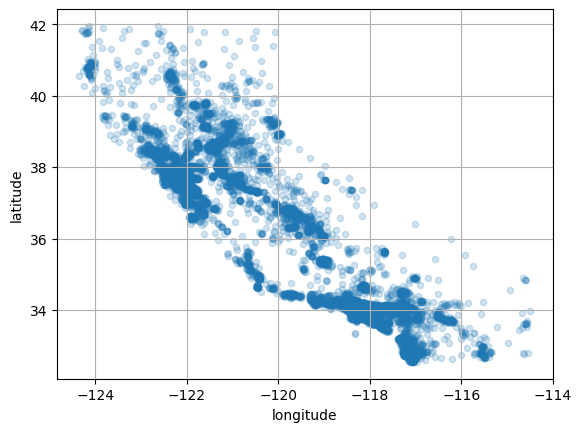

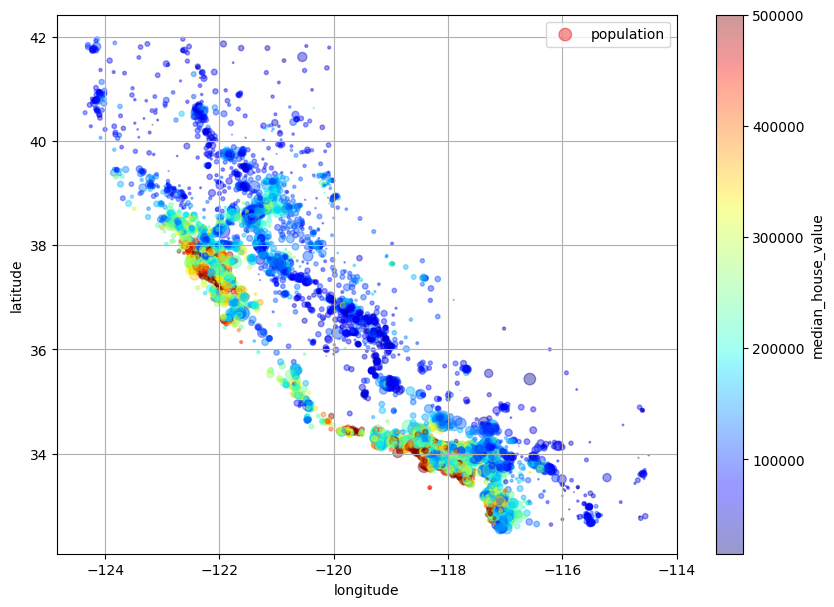

In [149]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

# Make it easier to visualize areas with high density of data points
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap="jet", colorbar=True, sharex=False)
plt.show()

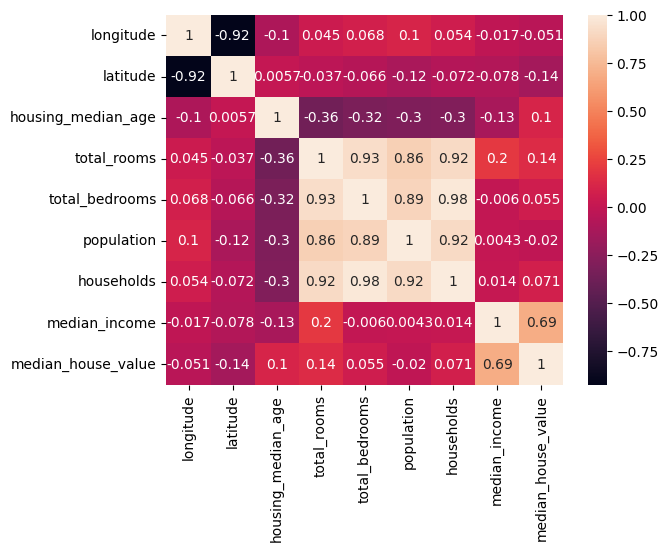

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

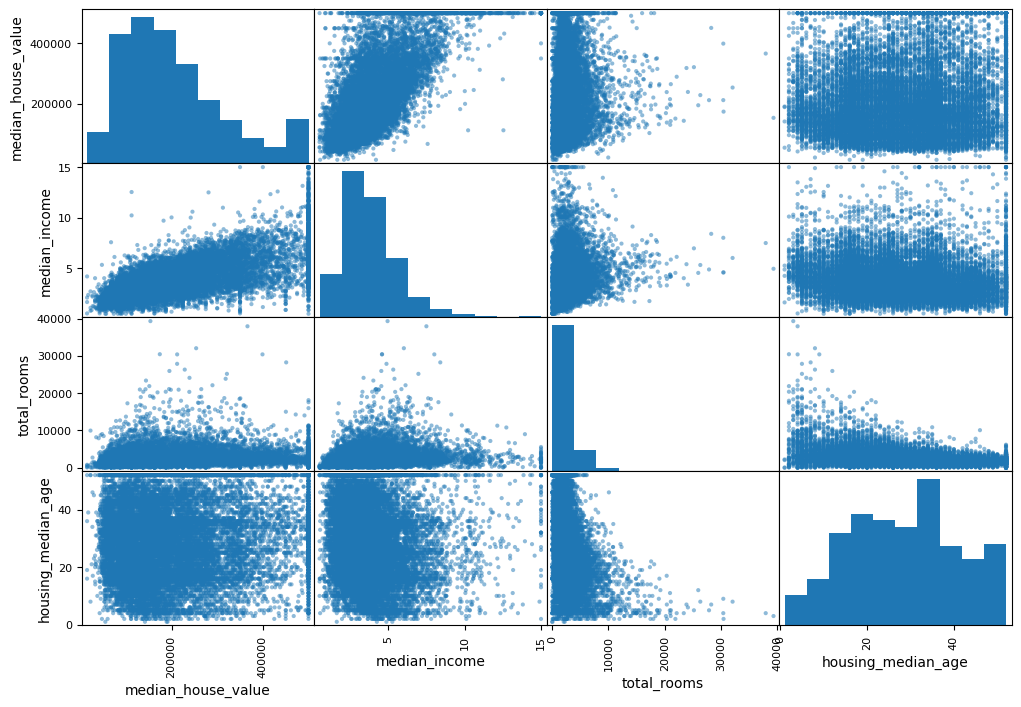

In [150]:
corr_matrix = housing.select_dtypes("number").corr()

import seaborn as sns
sns.heatmap(corr_matrix, annot=True)
plt.show()

display(corr_matrix["median_house_value"].sort_values(ascending=False))

# Scatter matrix
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

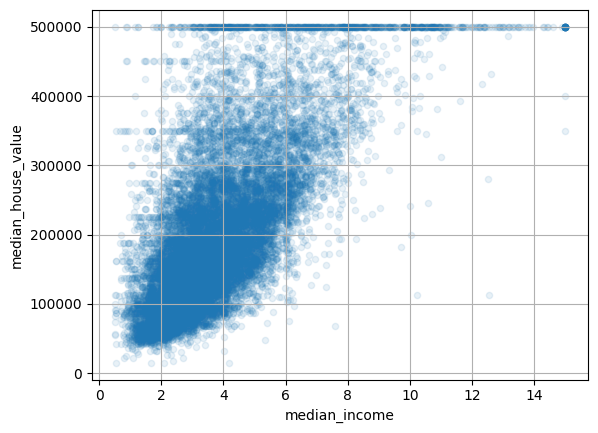

In [151]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)

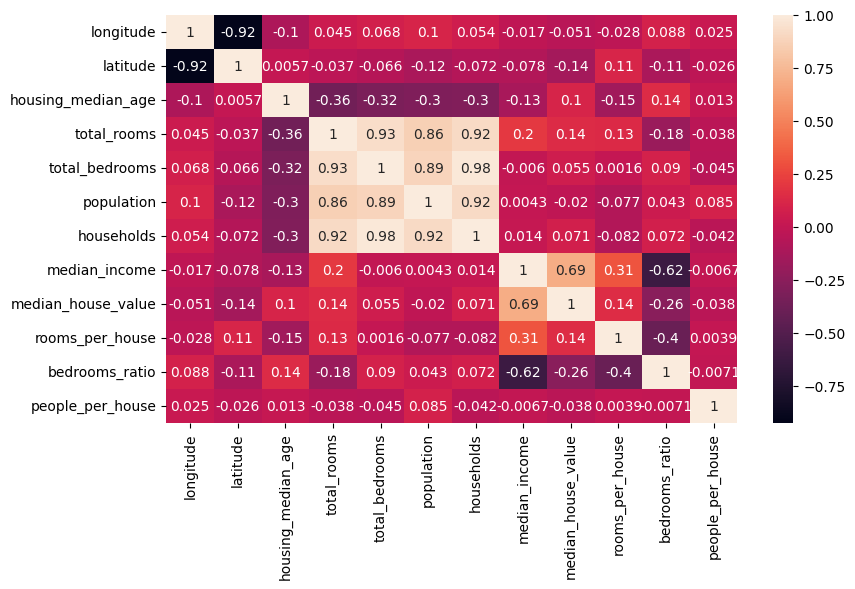

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In [152]:
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"] = housing["population"]/housing["households"]

corr_matrix = housing.select_dtypes("number").corr()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, ax=ax, annot=True)
plt.tight_layout()
plt.show()

display(corr_matrix["median_house_value"].sort_values(ascending=False))

In [153]:
# Prepare the data for ML algorithms
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
# Create features we explored earlier
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"] = housing["population"]/housing["households"]

# Impute missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# Only the numerical attributes since the median can only be computed on numerical attributes
housing_num = housing.select_dtypes("number")
imputer.fit(housing_num)
print(imputer.statistics_)
X = imputer.transform(housing_num)

# Convert the numpy array back to a dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat = housing[["ocean_proximity"]]

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# See the categories
print(cat_encoder.categories_)
# See the column names
print(cat_encoder.feature_names_in_)
# Get the feature names out
print(cat_encoder.get_feature_names_out())

[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.12500000e+03
  4.34000000e+02  1.16700000e+03  4.08000000e+02  3.53850000e+00
  5.23557310e+00  2.03105786e-01  2.82231619e+00]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
['ocean_proximity']
['ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']


In [154]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [155]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
13096    -122.42     37.80                52.0       3321.0          1115.0  \
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income ocean_proximity  rooms_per_house   
13096      1576.0      1034.0         2.0987        NEAR BAY         3.211799  \
14973       666.0       357.0         6.0876       <1H OCEAN         5.504202   
3785        562.0       203.0         2.4330          INLAND         5.334975   
14689      1845.0       780.0         2.2618          INLAND         5.351282   
20507      1912.0      1172.0         3.5292      NEAR OCEAN         3.725256   
...           ...         ...            ...             ...              ...   
14207       938.0       523.0         4.7105       <1H OCEAN         4.277247   
13105      1419.0       532.0         2.5733          INLAND         5.535714   
19301      2814.0       760.0         4.0616      NEAR OCEAN         5.157895   
19121      1725.0       838.0         4.1455       <1H OCEAN         4.511933   
19888       682.0       212.0         3.2833      NEAR OCEAN         2.033019   

       bedrooms_ratio  people_per_house  
13096        0.335742          1.524178  
14973        0.180153          1.865546  
3785         0.200369          2.768473  
14689        0.203881          2.365385  
20507        0.277371          1.631399  
...               ...               ...  
14207        0.266875          1.793499  
13105        0.201019          2.667293  
19301        0.197704          3.702632  
19121        0.230891          2.058473  
19888        0.452436          3.216981  

[16512 rows x 12 columns]

<a id='Chapter-2-ex'></a>
### Exercises

### 1)

In [180]:
# Training data has already been split into `housing`, and `housing_labels`

from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from scipy.stats import expon, loguniform

# Create a preprocessing pipeline ==> 1 for numeric, 1 for categorical
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

numeric_columns = housing.select_dtypes(include="number").columns
categorical_columns = housing.select_dtypes(exclude="number").columns

preprocessing_pipeline = ColumnTransformer([
    ("numeric_preprocessor", numeric_pipeline, numeric_columns),
    ("categorical_preprocessor", categorical_pipeline, categorical_columns)
])

# Create the final pipeline that combines an estimator with the preprocessing pipeline from above
pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("regressor", SVR())
])

# Use RandomSearchCV to find hyperparameter values and estimate generalization error.
param_grid = [
    {"regressor__kernel": ["linear"], "regressor__C": [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]},
    {"regressor__kernel": ["rbf"], "regressor__C": [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0], "regressor__gamma": [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]
cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, refit=True, scoring="neg_root_mean_squared_error")
cv.fit(housing, housing_labels)

# Get the results from RandomizedSearchCV
cv_results = pd.DataFrame(cv.cv_results_)
#### Change from negative to positive RMSE
score_columns = [x for x in cv_results.columns if ("test_score" in x or "train_score" in x)]
score_columns = [x for x in score_columns if "rank" not in x]
score_columns = [x for x in score_columns if "std" not in x]
cv_results[score_columns] = cv_results[score_columns] * -1
print(f"CV Results")
display(cv_results.sort_values(by="mean_test_score").head(5))
print(f"Best Hyperparameters\n{cv.best_params_}")


CV Results


mean_fit_time  std_fit_time  mean_score_time  std_score_time   
55       2.406196      0.038009         2.160939        0.103986  \
54       2.413715      0.025310         2.094212        0.006726   
49       2.373377      0.010680         2.109492        0.003033   
48       2.419782      0.045949         2.110282        0.003892   
53       2.414627      0.008738         2.111311        0.024282   

   param_regressor__C param_regressor__kernel param_regressor__gamma   
55            30000.0                     rbf                    3.0  \
54            30000.0                     rbf                    1.0   
49            10000.0                     rbf                    3.0   
48            10000.0                     rbf                    1.0   
53            30000.0                     rbf                    0.3   

                                               params  split0_test_score   
55  {'regressor__C': 30000.0, 'regressor__gamma': ...       61504.717703  \
54  {'regressor__C': 30000.0, 'regressor__gamma': ...       64532.901574   
49  {'regressor__C': 10000.0, 'regressor__gamma': ...       64991.176037   
48  {'regressor__C': 10000.0, 'regressor__gamma': ...       67830.388330   
53  {'regressor__C': 30000.0, 'regressor__gamma': ...       67787.132485   

    split1_test_score  split2_test_score  mean_test_score  std_test_score   
55       61524.220943       61661.685928     61563.541525       69.853833  \
54       64413.862241       64711.037712     64552.600509      122.118388   
49       64581.781284       64811.797033     64794.918118      167.560316   
48       67653.031044       67945.488653     67809.636009      120.293689   
53       67808.181404       68013.629544     67869.647811      102.172465   

    rank_test_score  
55                1  
54                2  
49                3  
48                4  
53                5

Best Hyperparameters
{'regressor__C': 30000.0, 'regressor__gamma': 3.0, 'regressor__kernel': 'rbf'}


In [181]:
# If you stopped here and wanted to use the test set ==>
### Use the exact same pipeline but replace SVR's hyperparameters with the hyperparameters you found from the results of RandomSearchCV
production_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("regressor", SVR(C=cv.best_params_["regressor__C"], gamma=cv.best_params_["regressor__gamma"], kernel=cv.best_params_["regressor__kernel"]))
])

# Add the features we engineered
strat_train_set["rooms_per_house"] = strat_train_set["total_rooms"]/strat_train_set["households"]
strat_train_set["bedrooms_ratio"] = strat_train_set["total_bedrooms"]/strat_train_set["total_rooms"]
strat_train_set["people_per_house"] = strat_train_set["population"]/strat_train_set["households"]

strat_test_set["rooms_per_house"] = strat_test_set["total_rooms"]/strat_test_set["households"]
strat_test_set["bedrooms_ratio"] = strat_test_set["total_bedrooms"]/strat_test_set["total_rooms"]
strat_test_set["people_per_house"] = strat_test_set["population"]/strat_test_set["households"]

# Refit on the entire training set
X_train = strat_train_set.drop(columns=["median_house_value"])
y_train = strat_train_set["median_house_value"].copy()

X_test = strat_test_set.drop(columns=["median_house_value"])
y_test = strat_test_set["median_house_value"].copy()

from sklearn.metrics import mean_squared_error

production_pipeline.fit(X_train, y_train)
y_pred = production_pipeline.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

60708.37696434178

### 2)

In [173]:
from sklearn.model_selection import RandomizedSearchCV

# Create a preprocessing pipeline
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorcial_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

numeric_columns = housing.select_dtypes(include="number").columns
categorcial_columns = housing.select_dtypes(exclude="number").columns

preprocessing_pipeline = ColumnTransformer([
    ("numeric_preprocessing", numeric_pipeline, numeric_columns),
    ("categorical_preprocessing", categorical_pipeline, categorcial_columns)
])

# Create a final pipeline with an Estimator at the end
pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("regressor", SVR())
])

# Set up hyperparamter search space
param_distributions = {
    "regressor__kernel": ["linear", "poly", "rbf"],
    "regressor__C": loguniform(20, 200000),
    "regressor__gamma": expon(scale=1)
}

# Use cross validation to find the optimal hyperparameters
cv = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions, cv=3, random_state=42, refit=True, scoring="neg_root_mean_squared_error")
cv.fit(housing, housing_labels)

cv_results = pd.DataFrame(cv.cv_results_)

#### Change from negative to positive RMSE
score_columns = [x for x in cv_results.columns if ("test_score" in x or "train_score" in x)]
score_columns = [x for x in score_columns if "rank" not in x]
score_columns = [x for x in score_columns if "std" not in x]
cv_results[score_columns] = cv_results[score_columns] * -1
print(f"CV Results")
display(cv_results.sort_values(by="mean_test_score").head(5))
print(f"Best Hyperparameters\n{cv.best_params_}")

CV Results


mean_fit_time  std_fit_time  mean_score_time  std_score_time   
1       2.345367      0.031509         0.574064        0.000299  \
3       2.155784      0.012079         0.573185        0.000504   
6       1.918021      0.022600         0.535958        0.003553   
9       2.409658      0.013261         2.090751        0.036477   
7       2.447352      0.027606         2.141801        0.018697   

  param_regressor__C param_regressor__gamma param_regressor__kernel   
1       26290.206464               0.908447                    poly  \
3        5075.631017                1.23125                    poly   
6        5901.413342               0.945856                  linear   
9        1334.473434               1.537936                     rbf   
7        1068.587452               0.344223                     rbf   

                                              params  split0_test_score   
1  {'regressor__C': 26290.206464300216, 'regresso...       63192.339997  \
3  {'regressor__C': 5075.631016531325, 'regressor...       65051.549238   
6  {'regressor__C': 5901.413341581061, 'regressor...       72196.173880   
9  {'regressor__C': 1334.4734340928408, 'regresso...       80735.317623   
7  {'regressor__C': 1068.5874522559543, 'regresso...       86192.313610   

   split1_test_score  split2_test_score  mean_test_score  std_test_score   
1       63893.354498       63812.414097     63632.702864      313.131951  \
3       65649.024594       65254.276809     65318.283547      248.081770   
6       71454.585378       71914.592391     71855.117216      305.659232   
9       80154.225805       80439.292393     80442.945274      237.243803   
7       84986.385094       85813.550448     85664.083051      503.535019   

   rank_test_score  
1                1  
3                2  
6                3  
9                4  
7                5

Best Hyperparameters
{'regressor__C': 26290.206464300216, 'regressor__gamma': 0.9084469696321253, 'regressor__kernel': 'poly'}


### 3)

In [192]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Set up preprocessing pipeline ==> 1 for numeric, 1 for categorical

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorcial_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

# Define which columns are numeric vs. categorical
numeric_columns = housing.select_dtypes(include="number").columns
categorcial_columns = housing.select_dtypes(exclude="number").columns

# Combine into single preprocessing pipeline
preprocessing_pipeline = ColumnTransformer([
    ("numeric_processor", numeric_pipeline, numeric_columns),
    ("categorical_processor", categorical_pipeline, categorical_columns)
])

# Create a final pipeline with an Estimator at the end
pipeline = Pipeline([
    ("preprocssing", preprocessing_pipeline),
    ("feature_selection", SelectFromModel(RandomForestRegressor(random_state=42), threshold=.01)),
    # Use the previously found best parameters from RandomizedSearchCV
    ("regressor", SVR(C=cv.best_params_["regressor__C"], kernel=cv.best_params_["regressor__kernel"], gamma=cv.best_params_["regressor__gamma"]))
])

# Since we already tuned the model, let's get the cross validation score

rmses = -cross_val_score(estimator=pipeline, X=housing, y=housing_labels, cv=3, scoring="neg_root_mean_squared_error")
rmses = pd.Series(rmses)
print("RMSEs for 3 fold CV")
display(rmses)
print(f"Mean test score = {rmses.mean()}")

RMSEs for 3 fold CV


0    60790.006698
1    60943.903686
2    61504.381929
dtype: float64

Mean test score = 61079.43077068787


### 4)

### 5)

#### Questions to Revist
1, 2, 3, 4, 5

<a id='Chapter-3'></a>
## Chapter 3

---

<a id='Chapter-3-rn'></a>
### Reading Notes:

**Question 1:** Why is accuracy not always the best measure of a classifier's performance? What method of evaluation can you use in situations where accuracy is not the ultimate goal, or is not informative of how well your model is performing?

**Answer:** Sometimes overall accuracy is not the main goal of a classification problem. For example if we are trying to predict cancerous tumors, then we want to limit the number of **False Positives** (Don't tell people who don't have cancer they do). A better method of evaluating a classifier is via the **Confusion Matrix**.

**Question 2:** What is a **type I** error? What is a **type II** error?

**Answer:** A type I error is a false positive. A type II error is a false negative

**Question 3:** What does the confusion matrix look like for a binary classification problem?

**Answer:** For binary classification:

| True Negative (TN) | False Positive(FP) |
| :----: | :---: |
| False Negative (FN)      | True Positive(TP)     |

**Question 4:** Define the following in terms of a classification problem:
1. Precision
1. Recall
1. F1-Score

**Answer:** 

**Precision:** Precision is the amount of true positives divided by the sum of true positive and false positives. (Aka the accuracy of the positive predictions)

*Math notation:* $\frac{TP}{TP + FP}$

*Example interpretation for a classifier that predicts whether a digit is a 5 or not with a precision of 0.83*: When the model predicts an image is a 5, it is correct 83% of the time

**Recall:** Recall is the amount of true positives divided by the sum of true positives and false negatives. It represents the true positive rate (Aka the ratio of positive instances correctly classified)

*Math notation:* $\frac{TP}{TP + FN}$

*Example interpretation for a classifier that predicts whether a digit is a 5 or not with a recall of 0.65*: The model gives the correct prediction for 65% of the 5's it was tested on

**F-1 Score:** The harmonic mean (different from simple average) of precision and recall

*Math notation:* $F 1 = 2 * \frac{precision * recall}{precision + recall} = \frac{TP}{TP + \frac{1}{2}(FP+FN)}$

**Question 5:** What is the *precision/recall tradeoff*?

**Answer:** Increasing / optimizing for precision comes at a cost of lowering recall and vice versa.

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)
X,y = mnist["data"], mnist["target"]

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

/Users/nathanjones/opt/anaconda3/envs/production-ml/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X shape = (70000, 784)
y shape = (70000,)


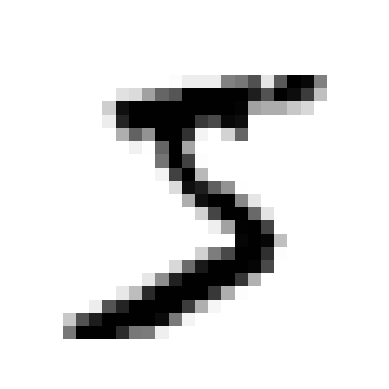

Label = 5


In [3]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

some_digit = X[0]
plot_digit(some_digit)
print(f"Label = {y[0]}")

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
y_train_5 = (y_train == "5") # True for all 5s, False for all other digits
y_test_5 = (y_test == "5")

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True])

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=sgd_clf, X=X_train, y=y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [7]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train))) # Prints False: no 5s detected

False


In [8]:
cross_val_score(estimator=dummy_clf, X=X_train, y=y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [9]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(estimator=sgd_clf, X=X_train, y=y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"precision_score = {precision_score(y_train_5, y_train_pred)}")
print(f"recall_score = {recall_score(y_train_5, y_train_pred)}")
print(f"f1_score = {f1_score(y_train_5, y_train_pred)}")

precision_score = 0.8370879772350012
recall_score = 0.6511713705958311
f1_score = 0.7325171197343846


In [11]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [13]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [14]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [15]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

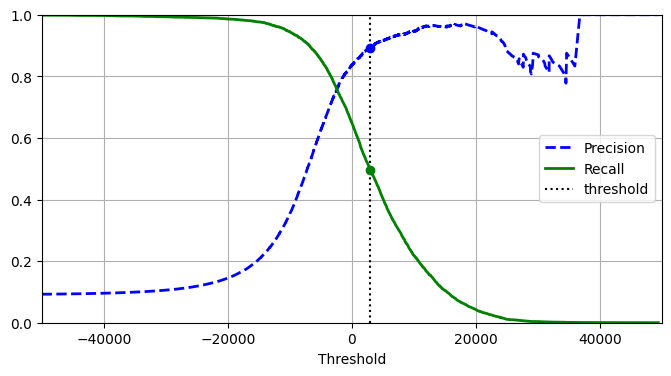

In [17]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

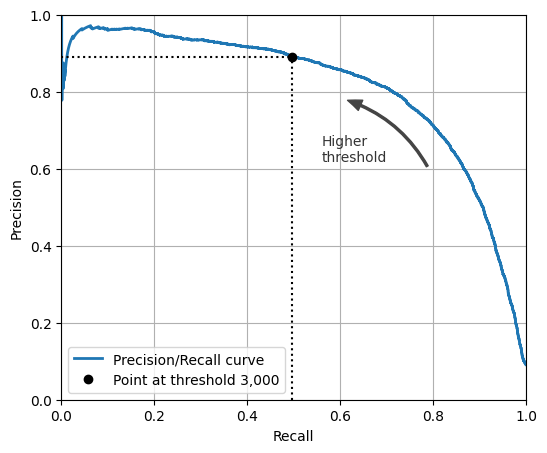

In [19]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [22]:
idx_for_precision_90 = (precisions >= 0.9).argmax()
threshold_for_90_precision = thresholds[idx_for_precision_90]
threshold_for_90_precision

3370.0194991439594

In [25]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
print(f"precision_score = {precision_score(y_train_5, y_train_pred_90)}")
print(f"recall_score = {recall_score(y_train_5, y_train_pred_90)}")

precision_score = 0.9000345901072293
recall_score = 0.4799852425751706


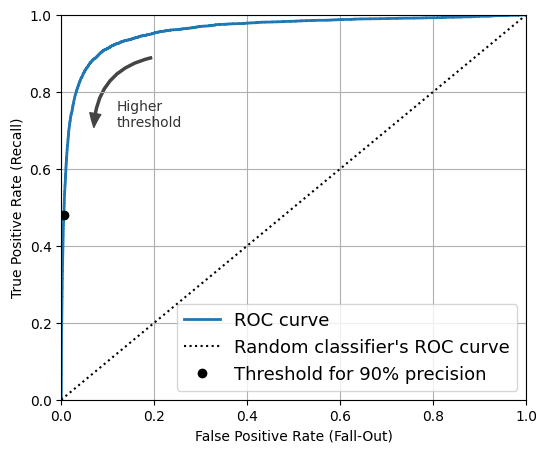

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

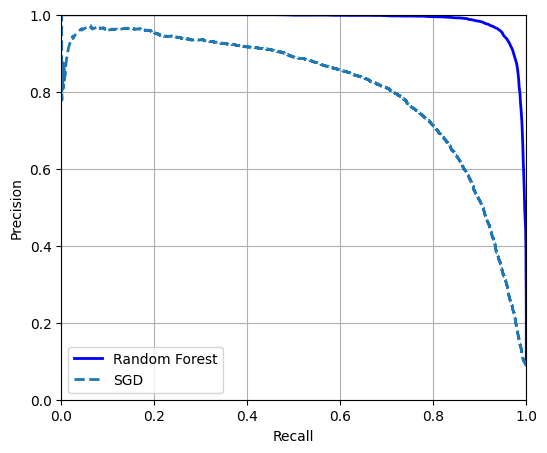

In [31]:
y_scores_forest = y_probas_forest[:, 1]  # score = proba of positive class
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [33]:
y_train_pred_forest = y_probas_forest[:, 1] > 0.5  # positive proba >= 0.5

print(f"F1 Score = {f1_score(y_train_5, y_train_pred_forest)}")
print(f"ROC AUC Score = {roc_auc_score(y_train_5, y_scores_forest)}")
print(f"Precision Score = {precision_score(y_train_5, y_train_pred_forest)}")
print(f"Recall Score = {recall_score(y_train_5, y_train_pred_forest)}")

F1 Score = 0.9242275142688446
ROC AUC Score = 0.9983436731328145
Precision Score = 0.9905083315756169
Recall Score = 0.8662608374838591


In [34]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # y_train, not y_train_5
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [35]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [36]:
class_id = some_digit_scores.argmax()
class_id

5

In [37]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [38]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [39]:
len(ovr_clf.estimators_)

10

In [40]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [41]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [42]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

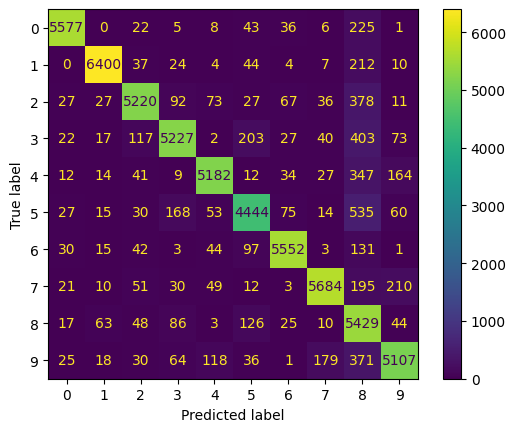

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

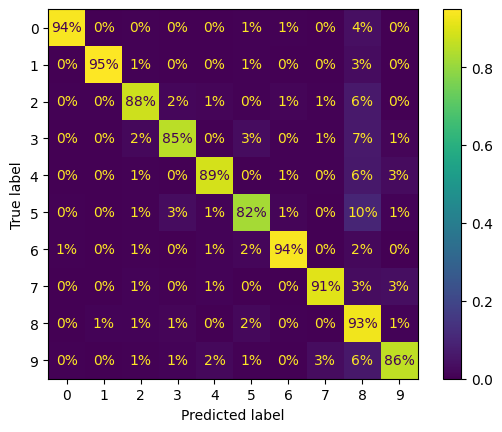

In [46]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

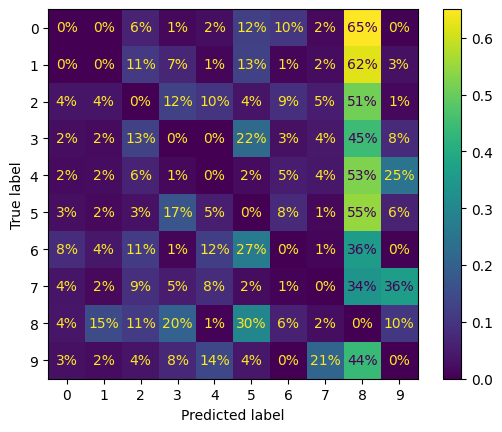

In [47]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

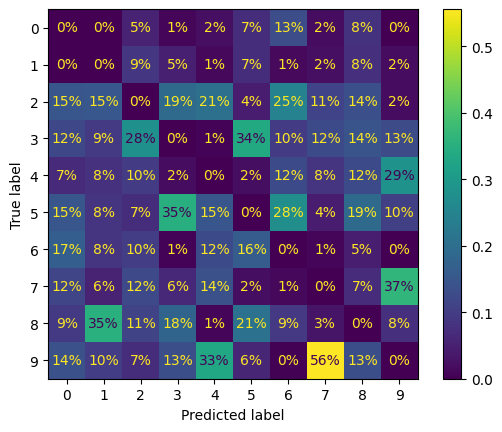

In [48]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="pred", values_format=".0%")
plt.show()

<a id='Chapter-3-ex'></a>
### Exercises

### 1)

In [ ]:
from sklearn.datasets import fetch_openml

# Get the data
mnist = fetch_openml("mnist_784", as_frame=False)
X,y = mnist["data"], mnist["target"]

# Seperate training and testing data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd

# Full pipeline
pipeline = Pipeline([
    # ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler()),
    ("clf", KNeighborsClassifier())
])

# Set up params for grid search
param_grid = {
    'clf__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'clf__weights': ['distance']
    # 'clf__p': [1, 2],
    # 'clf__metric': ['euclidean', 'manhattan'],
    # 'clf__leaf_size': [30, 50, 80]
}

cv = GridSearchCV(pipeline, param_grid, cv=3, scoring="accuracy")
cv.fit(X_train, y_train)
cv_results = pd.DataFrame(cv.cv_results_)
display(cv_results.sort_values(by="rank_test_score").head(5))
print(f"Best Params: {cv.best_params_}")
print(f"Best Score: {cv.best_score_}")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2       0.161071      0.000727         5.082539        0.319915   
4       0.166006      0.001645         4.945190        0.120051   
1       0.164295      0.001401         5.023714        0.102621   
3       0.164770      0.001334         5.162151        0.304255   
0       0.165436      0.003265         5.128667        0.058139   

  param_clf__n_neighbors param_clf__weights  \
2                      4           distance   
4                      6           distance   
1                      3           distance   
3                      5           distance   
0                      2           distance   

                                              params  split0_test_score  \
2  {'clf__n_neighbors': 4, 'clf__weights': 'dista...            0.97080   
4  {'clf__n_neighbors': 6, 'clf__weights': 'dista...            0.97005   
1  {'clf__n_neighbors': 3, 'clf__weights': 'dista...            0.97035   
3  {'clf__n_neighbors': 5, 'clf__weights': 'dista...            0.96880   
0  {'clf__n_neighbors': 2, 'clf__weights': 'dista...            0.96865   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
2            0.96980            0.97030         0.970300        0.000408   
4            0.96855            0.96985         0.969483        0.000665   
1            0.96890            0.96870         0.969317        0.000735   
3            0.96795            0.96905         0.968600        0.000471   
0            0.96690            0.96705         0.967533        0.000792   

   rank_test_score  
2                1  
4                2  
1                3  
3                4  
0                5

Best Params: {'clf__n_neighbors': 4, 'clf__weights': 'distance'}
Best Score: 0.9702999999999999


In [14]:
from sklearn.metrics import accuracy_score

y_pred = cv.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.9714


### 2)

In [1]:
import numpy as np

def get_shifted_images(direction):
    # Assuming you have a 2D NumPy array 'image_array' with shape (60000, 784)
    # Reshape the array to (60000, 28, 28) to represent the images
    image_array = X_train.reshape((60000, 28, 28))

    # Create a copy of the array
    shifted_array = np.copy(image_array)

    if direction == "right":
        # Shift all images to the right by 1 pixel
        shifted_array[:, :, 1:] = image_array[:, :, :-1]

    elif direction == "left":
        # Shift all images to the left by 1 pixel
        shifted_array[:, :, :-1] = image_array[:, :, 1:]
    
    elif direction == "up":
        # Shift all images up by 1 pixel
        shifted_array[:, 1:, :] = image_array[:, :-1, :]
    
    elif direction == "down":
        # Shift all images down by 1 pixel
        shifted_array[:, :-1, :] = image_array[:, 1:, :]

    # Reshape the shifted array back to (60000, 784)
    shifted_array = shifted_array.reshape((60000, 784))

    return shifted_array

X_train_right_shifted = get_shifted_images("right")
X_train_left_shifted = get_shifted_images("left")
X_train_up_shifted = get_shifted_images("up")
X_train_down_shifted = get_shifted_images("down")

X_train_augmented = np.concatenate((X_train, X_train_right_shifted, X_train_left_shifted, X_train_up_shifted, X_train_down_shifted))

# Concatenate the duplicates to the end of the original array
duplicates = np.tile(y_train, 4)
y_train_augmented = np.concatenate((y_train, duplicates), axis=0)

NameError: name 'X_train' is not defined

In [ ]:
pipeline = Pipeline([
    # ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=4, weights="distance"))
])

pipeline.fit(X_train_augmented, y_train_augmented)
y_pred = pipeline.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Accuracy Score: 0.9763


### 3)

In [1]:
# Download the titanic data
from pathlib import Path 
import pandas as pd 
import tarfile
import urllib.request
import matplotlib.pyplot as plt

def download_titanic_data():
    tarball_path = Path("datasets/titanic.tgz") 
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz" 
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
download_titanic_data()
train = pd.read_csv(Path("datasets/titanic/train.csv"))
test = pd.read_csv(Path("datasets/titanic/test.csv"))

data = pd.concat([train, test], axis=0)
data.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
# Shape of data, dtypes, NULL Counts, duplicate rows, dtype counts, distributions of numeric columns, # of unqiue values for string / categorical types
data.set_index("PassengerId", inplace=True)
# Shape of data
print(f"Dataframe has {data.shape[0]} rows and {data.shape[1]} columns")
print("\n")

# Data Types and Missing Values
print(f"Data Types, Missing Values Per Column, and Unique Values Per Column:\n")
df_overview = pd.DataFrame({
    "Column Name": data.columns,
    "Data Type": data.dtypes,
    "# Missing Values": data.isnull().sum(),
    "% Missing Values": data.isnull().mean() * 100,
    "Unique Values": data.nunique()
}).sort_values(by=["Data Type", "% Missing Values"]).reset_index(drop=True)
display(df_overview)
print("\n")

# Data Types Counts
print(f"Data Types Counts:\n")
display(data.dtypes.value_counts())

Dataframe has 1309 rows and 11 columns


Data Types, Missing Values Per Column, and Unique Values Per Column:



Column Name Data Type  # Missing Values  % Missing Values  Unique Values
0       Pclass     int64                 0          0.000000              3
1        SibSp     int64                 0          0.000000              7
2        Parch     int64                 0          0.000000              8
3         Fare   float64                 1          0.076394            281
4          Age   float64               263         20.091673             98
5     Survived   float64               418         31.932773              2
6         Name    object                 0          0.000000           1307
7          Sex    object                 0          0.000000              2
8       Ticket    object                 0          0.000000            929
9     Embarked    object                 2          0.152788              3
10       Cabin    object              1014         77.463713            186



Data Types Counts:



object     5
float64    3
int64      3
dtype: int64

`Cabin` is missing 77% of its values, we may want to drop this variable entirely. `Age` is missing 20% of its values, we could impute this later on or drop this variable as well.

The `Pclass`, `SibSp`, and `Parch` variables are `numeric` right now, but only have a few unique values so they are probably better encoded as categorical variables.

Numeric Variables Summary Statistics



Survived       Pclass          Age        SibSp        Parch  \
count  891.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean     0.383838     2.294882    29.881135     0.498854     0.385027   
std      0.486592     0.837836    14.413500     1.041658     0.865560   
min      0.000000     1.000000     0.166700     0.000000     0.000000   
25%      0.000000     2.000000    21.000000     0.000000     0.000000   
50%      0.000000     3.000000    28.000000     0.000000     0.000000   
75%      1.000000     3.000000    39.000000     1.000000     0.000000   
max      1.000000     3.000000    80.000000     8.000000     9.000000   

              Fare  
count  1308.000000  
mean     33.295479  
std      51.758668  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200

Distributions of Numeric Columns:



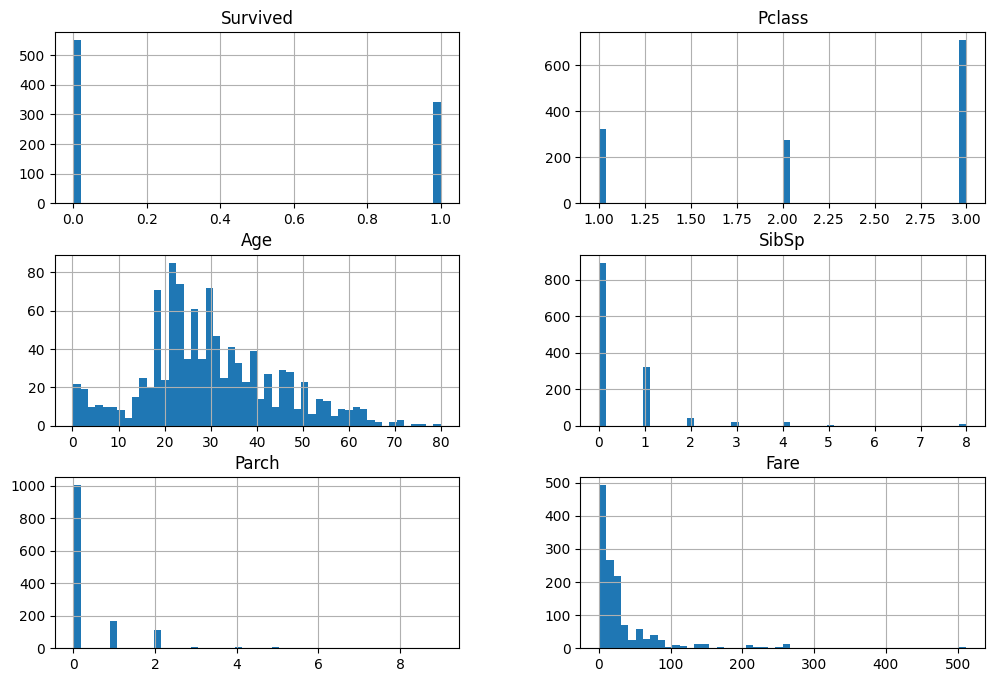

🚨 Name column had 20 or more unique values, so distribution skipped. Consider binning this variable 🚨
Here are the 5 most common values:
Connolly, Miss. Kate               2
Kelly, Mr. James                   2
Braund, Mr. Owen Harris            1
Johnson, Master. Harold Theodor    1
Gustafsson, Mr. Alfred Ossian      1
Name: Name, dtype: int64


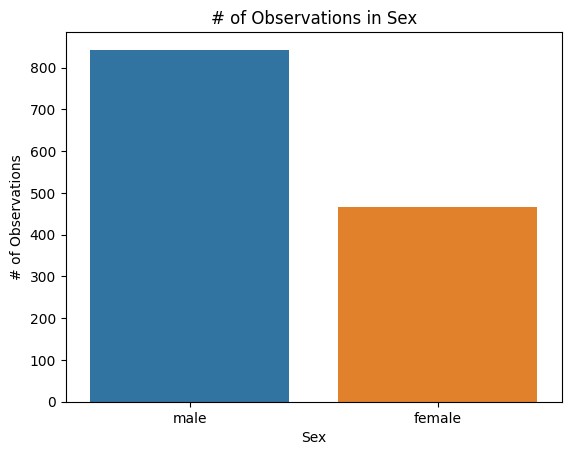

🚨 Ticket column had 20 or more unique values, so distribution skipped. Consider binning this variable 🚨
Here are the 5 most common values:
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
Name: Ticket, dtype: int64
🚨 Cabin column had 20 or more unique values, so distribution skipped. Consider binning this variable 🚨
Here are the 5 most common values:
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
Name: Cabin, dtype: int64


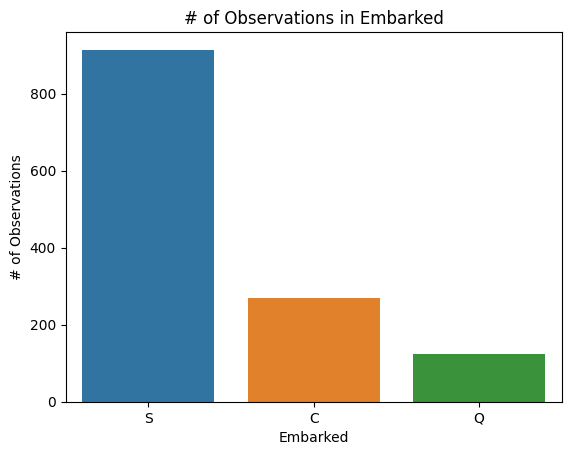

In [3]:
import seaborn as sns

# Summary Statistics
print(f"Numeric Variables Summary Statistics\n")
display(data.describe())

# Distributions of Numeric Columns
print(f"Distributions of Numeric Columns:\n")
data.hist(figsize=(12, 8), bins=50)
plt.show()

# Count plots of categorical columns
for col_name in data.select_dtypes(exclude="number").columns:
    nunique = data[col_name].nunique()
    desc_order = data[col_name].value_counts().index
    if nunique > 5 and nunique < 20:
        sns.countplot(data=data, y=col_name, order=desc_order)
        plt.title(f"# of Observations in {col_name}")
        plt.xlabel("# of Observations")
        plt.ylabel(col_name)
        plt.show()
    elif nunique <= 5:
        sns.countplot(data=data, x=col_name, order=desc_order)
        plt.title(f"# of Observations in {col_name}")
        plt.ylabel("# of Observations")
        plt.xlabel(col_name)
        plt.show()
    else:
        print(f"🚨 {col_name} column had 20 or more unique values, so distribution skipped. Consider binning this variable 🚨")
        print(f"Here are the 5 most common values:\n{data[col_name].value_counts().head(5)}")

We should try transforming and scaling `Age` and `Fare`. We can explore binning for `Parch` and `SibSp`.

We can try counting occurences of words inside of `Name`. We should try to extract some meaningful categories from `Ticket` as well.

In [4]:
titanic_train = train.copy()
titanic_train.set_index("PassengerId", inplace=True)
# Convert to categorical
titanic_train["Pclass"] = titanic_train["Pclass"].astype(str)
titanic_train["SibSp"] = titanic_train["SibSp"].astype(str)
titanic_train["Parch"] = titanic_train["Parch"].astype(str)
# Convert to int
target = "Survived"
titanic_train[target] = titanic_train[target].astype(int)

In [5]:
from ydata_profiling import ProfileReport
# Shape of titanic_train, dtypes, NULL Counts, dtype counts, distributions of numeric columns, # of unqiue values for string / categorical types, possible outliers etc.
## You can get a very good and quick EDA using pandas-profiling

# Create pandas_profiling EDA Report
profile = ProfileReport(titanic_train, title="Pandas Profiling Report")
# Display pandas_profiling EDA Report
profile.to_notebook_iframe()

# Identify Potential Outliers using the IQR Method
quant1 = []
quant3 = []
int_quartile_range = []
outlier_counts = []
for col_name in titanic_train.select_dtypes("number").columns:
    q1 = titanic_train[col_name].quantile(0.25)
    q3 = titanic_train[col_name].quantile(0.75)
    iqr = q3 - q1
    outlier_count = len(titanic_train[col_name][(titanic_train[col_name] < (q1 - 1.5 * iqr)) | (titanic_train[col_name] > (q3 + 1.5 * iqr))])
    outlier_counts.append(outlier_count)
    quant1.append(q1)
    quant3.append(q3)
    int_quartile_range.append(iqr)
outlier_df = pd.DataFrame({
    "column": titanic_train.select_dtypes("number").columns,
    "q1": quant1,
    "q3": quant3,
    "iqr": int_quartile_range,
    "outlier_count": outlier_counts
}).sort_values(by="outlier_count", ascending=False).reset_index(drop=True)
print(f"\nNumber of potential outliers per column (IQR method)\n")
print(f"To examine outliers run: titanic_train[((titanic_train[col_name] < (q1 - 1.5 * iqr)) | (titanic_train[col_name] > (q3 + 1.5 * iqr)))]")
display(outlier_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


Number of potential outliers per column (IQR method)

To examine outliers run: titanic_train[((titanic_train[col_name] < (q1 - 1.5 * iqr)) | (titanic_train[col_name] > (q3 + 1.5 * iqr)))]


column       q1    q3      iqr  outlier_count
0      Fare   7.9104  31.0  23.0896            116
1       Age  20.1250  38.0  17.8750             11
2  Survived   0.0000   1.0   1.0000              0

/var/folders/7r/kt5n63tx35qgs41q12b8z_3w0000gn/T/ipykernel_52730/4116523224.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(titanic_train.corr(method="pearson"),


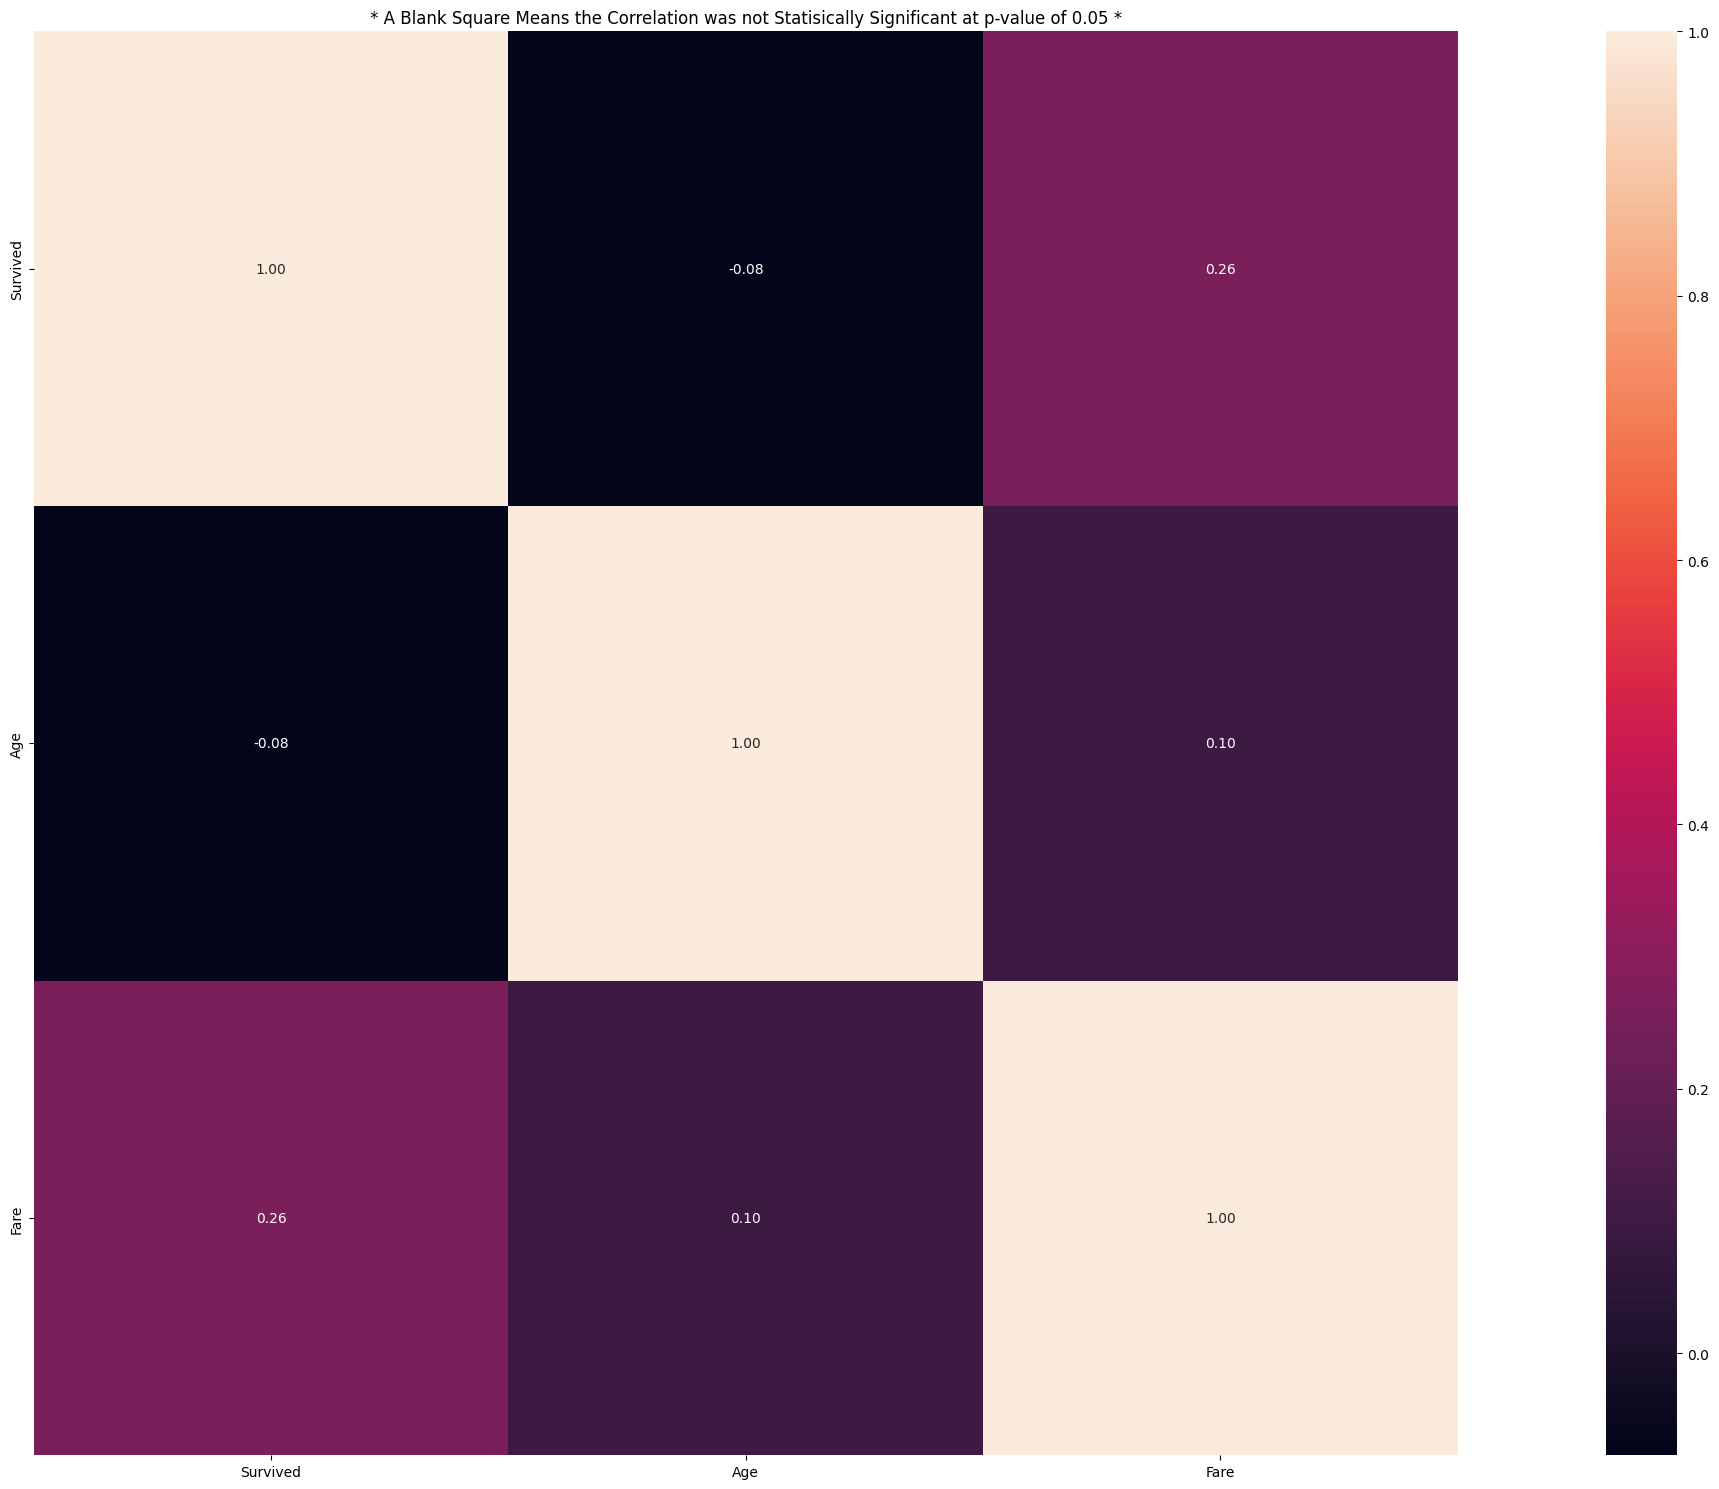

In [6]:
import scipy.stats

# Pearson's r Correlation Heatmap
# Correlation Matrix

# Code to "mask" correlations that are not statistically significant from heatmap
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = scipy.stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

# p_values = corr_sig(train_data.select_dtypes('number'))
# mask = np.invert(np.tril(p_values<0.05))

# Set up the matplotlib figure
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(30, 15))

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(titanic_train.corr(method="pearson"),
                    #    mask=mask,
                       annot=True,
                       fmt='.2f',
                       square=True)
g.set(title="* A Blank Square Means the Correlation was not Statisically Significant at p-value of 0.05 *")
f.set_tight_layout(True)

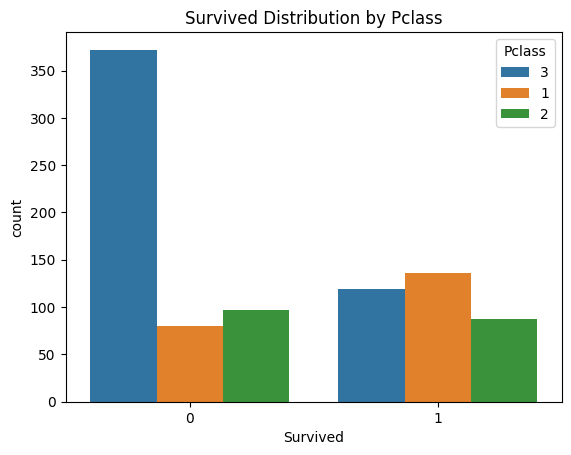

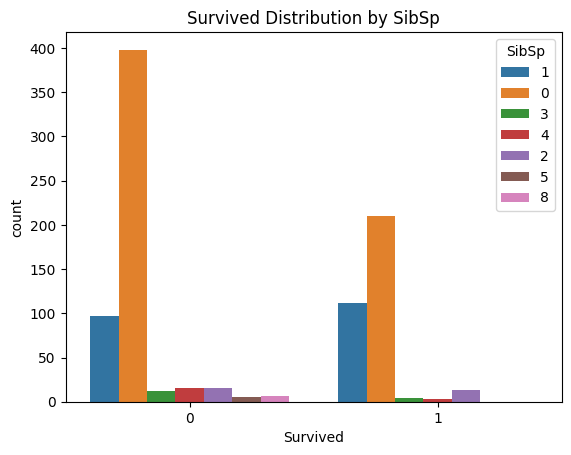

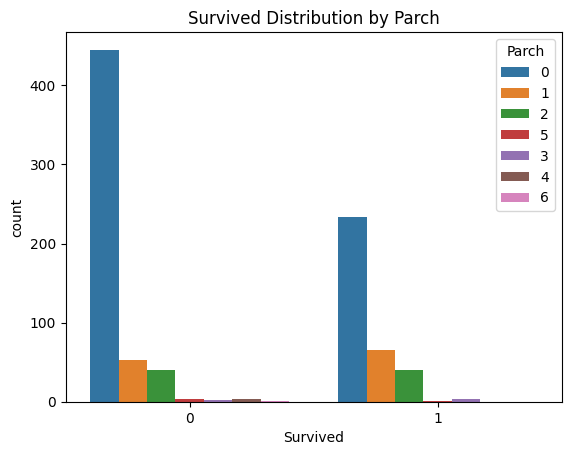

In [7]:
titanic_train[target] = titanic_train[target].astype(int)
for col_name in ["Pclass", "SibSp", "Parch"]:
    g = sns.countplot(data=titanic_train, x=target, hue=col_name)
    g.set(xlabel="Survived")
    g.set_title(f"Survived Distribution by {col_name}")
    plt.show()

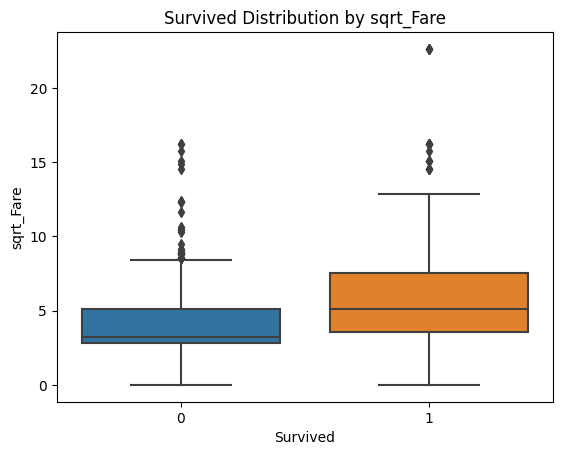

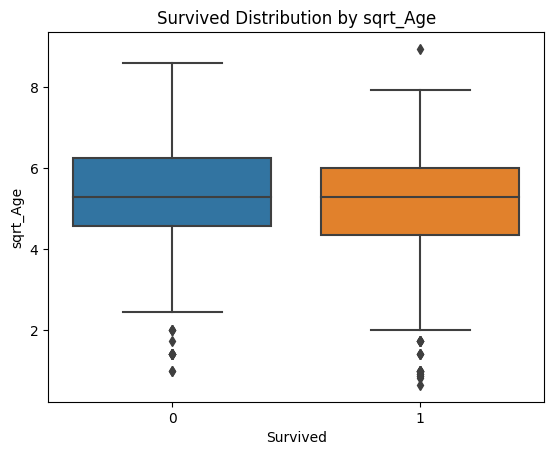

In [9]:
import numpy as np

titanic_train["sqrt_Fare"] = np.sqrt(titanic_train["Fare"])
titanic_train["sqrt_Age"] = np.sqrt(titanic_train["Age"])

for col_name in ["sqrt_Fare", "sqrt_Age"]:
    g = sns.boxplot(data=titanic_train, x=target, y=col_name)
    g.set(xlabel="Survived", ylabel=col_name)
    g.set_title(f"Survived Distribution by {col_name}")
    plt.show()

In [10]:
# Extract the name prefixes
name_prefixes = titanic_train["Name"].str.split(',').str[1].str.split('.').str[0].str.replace(' ', '')
titanic_train["name_prefix"] = name_prefixes

# Change consolidated_name_prefix
def consolidate_prefixes(data):
    prefix = data["name_prefix"]
    if prefix in ["Mr"] and data["Sex"] == "male":
        return "Mr"
    
    elif prefix in ["Capt", "Col", "Don", "Dr", "Jonkheer", "Major", "Master", "Rev", "Sir"] and data["Sex"] == "male":
        return "PrestigiousMr"
    
    elif prefix in ["Miss", "Ms", "Mlle"] and data["Sex"] == "female":
        return "Miss"
    
    elif prefix in ["Dona", "Mme", "Mrs", "Lady", "Dr", "theCountess"] and data["Sex"] == "female":
        return "Mrs"
    
    else:
        return 'error_left_uncategorized'
# Create a new column with the consolidated prefixes
titanic_train["consolidated_name_prefix"] = titanic_train.apply(consolidate_prefixes, axis=1)

In [11]:
# Convert to categorical indicating if passenger had any siblings or spouse on board
titanic = titanic_train.drop(columns=["Fare", "Age", "Ticket", "Cabin", "Name", "name_prefix"])
titanic["SibSp"] = titanic["SibSp"].astype(int)
titanic["Parch"] = titanic["Parch"].astype(int)
titanic["Parch_plus_SibSp"] = titanic["Parch"] + titanic["SibSp"]

titanic["SibSp"] = [True if x > 0 else False for x in titanic["SibSp"]]
titanic["Parch"] = [True if x > 0 else False for x in titanic["Parch"]]
titanic["Parch_plus_SibSp"] = [True if x > 0 else False for x in titanic["Parch_plus_SibSp"]]

titanic = titanic.drop(columns=["Parch_plus_SibSp"])
titanic

Survived Pclass     Sex  SibSp  Parch Embarked  sqrt_Fare  \
PassengerId                                                              
1                   0      3    male   True  False        S   2.692582   
2                   1      1  female   True  False        C   8.442944   
3                   1      3  female  False  False        S   2.815138   
4                   1      1  female   True  False        S   7.286975   
5                   0      3    male  False  False        S   2.837252   
...               ...    ...     ...    ...    ...      ...        ...   
887                 0      2    male  False  False        S   3.605551   
888                 1      1  female  False  False        S   5.477226   
889                 0      3  female   True   True        S   4.842520   
890                 1      1    male  False  False        C   5.477226   
891                 0      3    male  False  False        Q   2.783882   

             sqrt_Age consolidated_name_prefix  
PassengerId                                     
1            4.690416                       Mr  
2            6.164414                      Mrs  
3            5.099020                     Miss  
4            5.916080                      Mrs  
5            5.916080                       Mr  
...               ...                      ...  
887          5.196152            PrestigiousMr  
888          4.358899                     Miss  
889               NaN                     Miss  
890          5.099020                       Mr  
891          5.656854                       Mr  

[891 rows x 9 columns]

interval columns not set, guessing: ['Survived', 'sqrt_Fare', 'sqrt_Age']


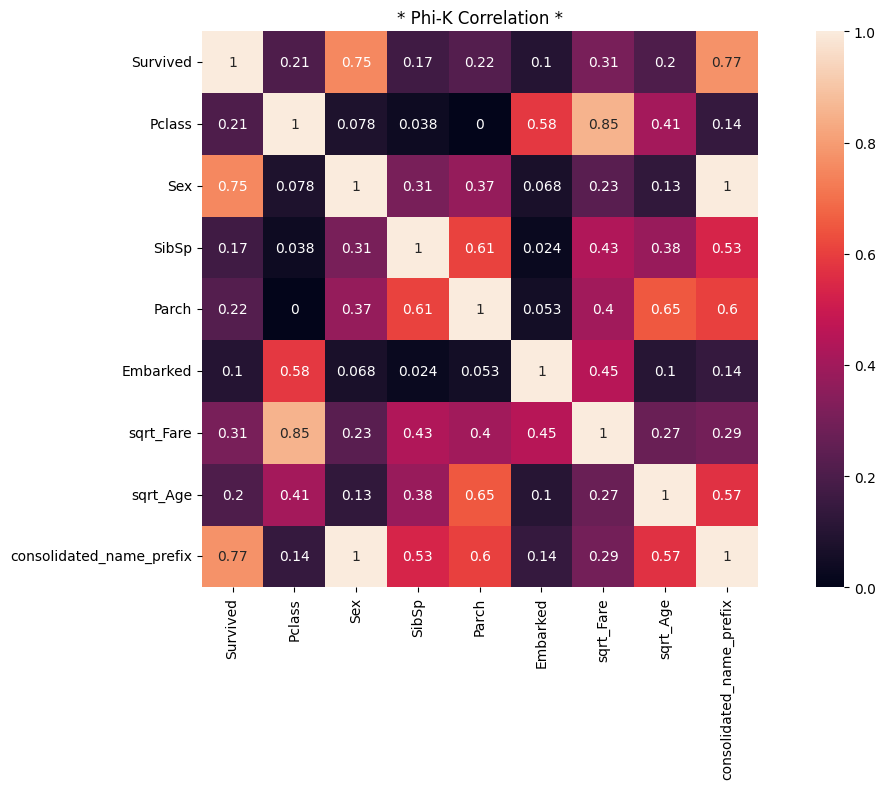

In [12]:
import phik

# Phi-k Correlations (Categorical and Numeric combined)
f, ax = plt.subplots(figsize=(12, 8))
g = sns.heatmap(data=titanic.phik_matrix(), annot=True, square=True)
g.set(title="* Phi-K Correlation *")
f.set_tight_layout(True)

In [19]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

X_train = titanic.drop(columns=["Survived"])
y_train = titanic["Survived"]

# Preprocessing Pipeline
numeric_pipeline = Pipeline([
    # ("imputer", SimpleImputer(strategy="median")),
    ("imputer", KNNImputer()),
    ("scaler", MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("one_hot_encoder", OneHotEncoder())
])

numeric_columns = X_train.select_dtypes(include="number").columns
categorical_columns = X_train.select_dtypes(exclude="number").columns

preprocessing_pipeline = ColumnTransformer([
    ("numeric", numeric_pipeline, numeric_columns),
    ("categorical", categorical_pipeline, categorical_columns)
])

# Candidate Models
logistic_regression_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("polynomial", PolynomialFeatures()),
    ("logistic_regression_model", LogisticRegression())
])

knn_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("polynomial", PolynomialFeatures()),
    ("knn_model", KNeighborsClassifier())
])

svm_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("polynomial", PolynomialFeatures()),
    ("svm_model", SVC())
])

random_forest_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("polynomial", PolynomialFeatures()),
    ("random_forest_model", RandomForestClassifier(random_state=42))
])

xgboost_pipeline = Pipeline([
    ("preprocessing", preprocessing_pipeline),
    ("polynomial", PolynomialFeatures()),
    ("xgboost_model", XGBClassifier(random_state=42))
])

# Score all of the models using cross_val_score
from sklearn.model_selection import cross_val_score

mean_test_scores = []
for pipeline in [logistic_regression_pipeline, knn_pipeline, svm_pipeline, random_forest_pipeline, xgboost_pipeline]:
    scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="accuracy")
    print(f"Distribution of CV Scores for the {pipeline.steps[2][0]} model:")
    display(pd.Series(scores).describe())
    print(f"Mean Test Score for the {pipeline.steps[2][0]} model: {scores.mean()}\n\n")
    mean_test_scores.append(scores.mean())

best_test_score_idx = np.argmax(mean_test_scores)
print(f"Highest Accuracy = {round(mean_test_scores[best_test_score_idx], 3)}, Achieved by the {['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'XGBoost'][best_test_score_idx]} Model")


Distribution of CV Scores for the logistic_regression_model model:


/Users/nathanjones/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nathanjones/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

count    3.000000
mean     0.822671
std      0.018544
min      0.801347
25%      0.816498
50%      0.831650
75%      0.833333
max      0.835017
dtype: float64

Mean Test Score for the logistic_regression_model model: 0.8226711560044894


Distribution of CV Scores for the knn_model model:


count    3.000000
mean     0.786756
std      0.039024
min      0.750842
25%      0.765993
50%      0.781145
75%      0.804714
max      0.828283
dtype: float64

Mean Test Score for the knn_model model: 0.7867564534231201


Distribution of CV Scores for the svm_model model:


count    3.000000
mean     0.820426
std      0.008473
min      0.811448
25%      0.816498
50%      0.821549
75%      0.824916
max      0.828283
dtype: float64

Mean Test Score for the svm_model model: 0.8204264870931537


Distribution of CV Scores for the random_forest_model model:


count    3.000000
mean     0.799102
std      0.014018
min      0.787879
25%      0.791246
50%      0.794613
75%      0.804714
max      0.814815
dtype: float64

Mean Test Score for the random_forest_model model: 0.7991021324354657


Distribution of CV Scores for the xgboost_model model:


count    3.000000
mean     0.789001
std      0.007009
min      0.781145
25%      0.786195
50%      0.791246
75%      0.792929
max      0.794613
dtype: float64

Mean Test Score for the xgboost_model model: 0.7890011223344556


Highest Accuracy = 0.823, Achieved by the Logistic Regression Model


Logistic Regression    0.822671
SVM                    0.820426
Random Forest          0.799102
XGBoost                0.789001
KNN                    0.786756
dtype: float64

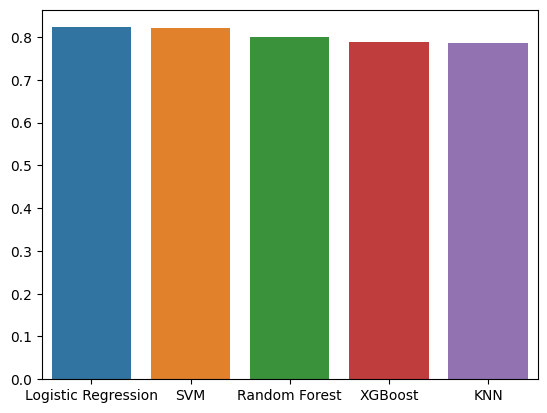

In [23]:
mean_test_scores = pd.Series(mean_test_scores, index=['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'XGBoost'])
display(mean_test_scores.sort_values(ascending=False))
sns.barplot(y=mean_test_scores, x=['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'XGBoost'], order=mean_test_scores.sort_values(ascending=False).index)
plt.show()

In [29]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Fine tune Logistic Regression, SVM, Random Forest models and re-evaluate

# Logistic Regression
logistic_regression_param_dist = {
    'logistic_regression_model__C': sp_uniform(loc=0.001, scale=1),
    'logistic_regression_model__penalty': ['l1', 'l2'],
    'logistic_regression_model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Random Forest 
random_forest_param_dist = {
    "random_forest_model__n_estimators": sp_randint(10, 200),
    "random_forest_model__max_depth": [2, 4, 6, 8, 10, None],
    "random_forest_model__max_features": sp_randint(1, 11),
    "random_forest_model__min_samples_split": sp_randint(2, 11),
    "random_forest_model__min_samples_leaf": sp_randint(1, 11),
    "random_forest_model__bootstrap": [True,False]
}

# SVM
svm_param_dist = {
   "svm_model__C": np.logspace(-3, 3, num=7), # Alternatively: use `sp_uniform(loc=-3,scale=6)` for a continuous range of C values.
   "svm_model__kernel":["linear", "poly", "rbf", "sigmoid"],
    "svm_model__gamma": sp_uniform(loc=0,scale=6) # Alternatively: use `sp_uniform(loc=-3,scale=6)` for a continuous range of gamma values.
}

# Initialize list to store mean test scores
mean_test_scores = []

lr_cv = RandomizedSearchCV(estimator=logistic_regression_pipeline, param_distributions=logistic_regression_param_dist, cv=3, random_state=42, n_jobs=-1)
lr_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(lr_cv.cv_results_)
print(f"Logistic Regression CV Results")
display(cv_results.sort_values(by="mean_test_score", ascending=False).head(5))
print(f"Logistic Regression Best Hyperparameters\n{lr_cv.best_params_}")
print(f"Logistic Regression Mean Test Score\n{lr_cv.best_score_}")
mean_test_scores.append(("Logistic Regression", lr_cv.best_score_))

rf_cv = RandomizedSearchCV(estimator=random_forest_pipeline, param_distributions=random_forest_param_dist, cv=3, random_state=42, n_jobs=-1)
rf_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(rf_cv.cv_results_)
print(f"Random Forest CV Results")
display(cv_results.sort_values(by="mean_test_score", ascending=False).head(5))
print(f"Random Forest Best Hyperparameters\n{rf_cv.best_params_}")
print(f"Random Forest Mean Test Score\n{rf_cv.best_score_}")
mean_test_scores.append(("Random Forest", rf_cv.best_score_))

svm_cv = RandomizedSearchCV(estimator=svm_pipeline, param_distributions=svm_param_dist, cv=3, random_state=42, n_jobs=-1)
svm_cv.fit(X_train, y_train)
cv_results = pd.DataFrame(svm_cv.cv_results_)
print(f"SVM CV Results")
display(cv_results.sort_values(by="mean_test_score", ascending=False).head(5))
print(f"SVM Best Hyperparameters\n{svm_cv.best_params_}")
print(f"SVM Mean Test Score\n{svm_cv.best_score_}")
mean_test_scores.append(("SVM", svm_cv.best_score_))

Logistic Regression CV Results


/Users/nathanjones/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nathanjones/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nathanjones/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nathanjones/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failur

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7       0.020121      0.001735         0.003668        0.000595   
3       0.013259      0.002043         0.005836        0.001438   
5       0.070878      0.008685         0.003473        0.000179   
6       0.015982      0.000714         0.004390        0.001589   
9       0.011025      0.002567         0.003279        0.000082   

  param_logistic_regression_model__C param_logistic_regression_model__penalty  \
7                           0.525756                                       l2   
3                           0.867176                                       l2   
5                           0.939553                                       l2   
6                           0.184405                                       l2   
9                           0.047666                                       l2   

  param_logistic_regression_model__solver  \
7                               newton-cg   
3                               liblinear   
5                                     sag   
6                                   lbfgs   
9                               liblinear   

                                              params  split0_test_score  \
7  {'logistic_regression_model__C': 0.52575643163...           0.804714   
3  {'logistic_regression_model__C': 0.86717614577...           0.797980   
5  {'logistic_regression_model__C': 0.93955270901...           0.797980   
6  {'logistic_regression_model__C': 0.18440450985...           0.811448   
9  {'logistic_regression_model__C': 0.04766566321...           0.804714   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
7           0.828283           0.835017         0.822671        0.012992   
3           0.831650           0.835017         0.821549        0.016722   
5           0.831650           0.835017         0.821549        0.016722   
6           0.824916           0.824916         0.820426        0.006349   
9           0.828283           0.818182         0.817059        0.009655   

   rank_test_score  
7                1  
3                2  
5                2  
6                4  
9                5

Logistic Regression Best Hyperparameters
{'logistic_regression_model__C': 0.5257564316322378, 'logistic_regression_model__penalty': 'l2', 'logistic_regression_model__solver': 'newton-cg'}
Logistic Regression Mean Test Score
0.8226711560044894
Random Forest CV Results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.221558      0.010780         0.020438        0.010598   
2       0.104450      0.031190         0.015701        0.010948   
1       0.161323      0.004207         0.019586        0.008997   
7       0.024856      0.005947         0.008090        0.001283   
8       0.109679      0.004966         0.010807        0.001109   

  param_random_forest_model__bootstrap param_random_forest_model__max_depth  \
0                                 True                                    8   
2                                False                                    6   
1                                 True                                    6   
7                                 True                                    4   
8                                False                                   10   

  param_random_forest_model__max_features  \
0                                       8   
2                                       6   
1                                       8   
7                                       4   
8                                       2   

  param_random_forest_model__min_samples_leaf  \
0                                           5   
2                                           5   
1                                           5   
7                                           9   
8                                           4   

  param_random_forest_model__min_samples_split  \
0                                            8   
2                                            3   
1                                            5   
7                                            3   
8                                            8   

  param_random_forest_model__n_estimators  \
0                                     131   
2                                      97   
1                                     113   
7                                      18   
8                                     181   

                                              params  split0_test_score  \
0  {'random_forest_model__bootstrap': True, 'rand...           0.794613   
2  {'random_forest_model__bootstrap': False, 'ran...           0.804714   
1  {'random_forest_model__bootstrap': True, 'rand...           0.808081   
7  {'random_forest_model__bootstrap': True, 'rand...           0.794613   
8  {'random_forest_model__bootstrap': False, 'ran...           0.801347   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.848485           0.824916         0.822671        0.022050   
2           0.828283           0.821549         0.818182        0.009912   
1           0.831650           0.811448         0.817059        0.010408   
7           0.841751           0.811448         0.815937        0.019504   
8           0.831650           0.804714         0.812570        0.013561   

   rank_test_score  
0                1  
2                2  
1                3  
7                4  
8                5

Random Forest Best Hyperparameters
{'random_forest_model__bootstrap': True, 'random_forest_model__max_depth': 8, 'random_forest_model__max_features': 8, 'random_forest_model__min_samples_leaf': 5, 'random_forest_model__min_samples_split': 8, 'random_forest_model__n_estimators': 131}
Random Forest Mean Test Score
0.8226711560044894
SVM CV Results


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       0.051158      0.011423         0.023757        0.008997   
3       0.041776      0.015398         0.039727        0.043125   
4       0.036669      0.003699         0.028324        0.002836   
6       4.081411      2.428505         0.007586        0.000309   
2       0.210501      0.038441         0.024017        0.004463   

  param_svm_model__C param_svm_model__gamma param_svm_model__kernel  \
1                0.1               4.678146                  linear   
3                0.1               2.755493                  linear   
4                1.0               0.857201                     rbf   
6                1.0               5.631316                    poly   
2             1000.0               2.674997                     rbf   

                                              params  split0_test_score  \
1  {'svm_model__C': 0.1, 'svm_model__gamma': 4.67...           0.821549   
3  {'svm_model__C': 0.1, 'svm_model__gamma': 2.75...           0.821549   
4  {'svm_model__C': 1.0, 'svm_model__gamma': 0.85...           0.784512   
6  {'svm_model__C': 1.0, 'svm_model__gamma': 5.63...           0.727273   
2  {'svm_model__C': 1000.0, 'svm_model__gamma': 2...           0.734007   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
1           0.831650           0.818182         0.823793        0.005723   
3           0.831650           0.818182         0.823793        0.005723   
4           0.804714           0.794613         0.794613        0.008247   
6           0.791246           0.764310         0.760943        0.026225   
2           0.760943           0.747475         0.747475        0.010997   

   rank_test_score  
1                1  
3                1  
4                3  
6                4  
2                5

SVM Best Hyperparameters
{'svm_model__C': 0.1, 'svm_model__gamma': 4.678146001636616, 'svm_model__kernel': 'linear'}
SVM Mean Test Score
0.8237934904601572


In [30]:
mean_test_scores = pd.Series([score[1] for score in mean_test_scores], index=[score[0] for score in mean_test_scores])
display(mean_test_scores.sort_values(ascending=False))

SVM                    0.823793
Logistic Regression    0.822671
Random Forest          0.822671
dtype: float64

In [33]:
titanic_train

Survived Pclass  \
PassengerId                    
1                   0      3   
2                   1      1   
3                   1      3   
4                   1      1   
5                   0      3   
...               ...    ...   
887                 0      2   
888                 1      1   
889                 0      3   
890                 1      1   
891                 0      3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...                                                        ...     ...   ...   
887                                      Montvila, Rev. Juozas    male  27.0   
888                               Graham, Miss. Margaret Edith  female  19.0   
889                   Johnston, Miss. Catherine Helen 'Carrie'  female   NaN   
890                                      Behr, Mr. Karl Howell    male  26.0   
891                                        Dooley, Mr. Patrick    male  32.0   

            SibSp Parch            Ticket     Fare Cabin Embarked  sqrt_Fare  \
PassengerId                                                                    
1               1     0         A/5 21171   7.2500   NaN        S   2.692582   
2               1     0          PC 17599  71.2833   C85        C   8.442944   
3               0     0  STON/O2. 3101282   7.9250   NaN        S   2.815138   
4               1     0            113803  53.1000  C123        S   7.286975   
5               0     0            373450   8.0500   NaN        S   2.837252   
...           ...   ...               ...      ...   ...      ...        ...   
887             0     0            211536  13.0000   NaN        S   3.605551   
888             0     0            112053  30.0000   B42        S   5.477226   
889             1     2        W./C. 6607  23.4500   NaN        S   4.842520   
890             0     0            111369  30.0000  C148        C   5.477226   
891             0     0            370376   7.7500   NaN        Q   2.783882   

             sqrt_Age name_prefix consolidated_name_prefix  
PassengerId                                                 
1            4.690416          Mr                       Mr  
2            6.164414         Mrs                      Mrs  
3            5.099020        Miss                     Miss  
4            5.916080         Mrs                      Mrs  
5            5.916080          Mr                       Mr  
...               ...         ...                      ...  
887          5.196152         Rev            PrestigiousMr  
888          4.358899        Miss                     Miss  
889               NaN        Miss                     Miss  
890          5.099020          Mr                       Mr  
891          5.656854          Mr                       Mr  

[891 rows x 15 columns]

In [48]:
test = pd.read_csv(Path("datasets/titanic/test.csv"))

test["sqrt_Fare"] = np.sqrt(test["Fare"])
test["sqrt_Age"] = np.sqrt(test["Age"])
test.set_index("PassengerId", inplace=True)
# Convert to categorical
test["Pclass"] = test["Pclass"].astype(str)
test["SibSp"] = test["SibSp"].astype(str)
test["Parch"] = test["Parch"].astype(str)

# Extract the name prefixes
name_prefixes = test["Name"].str.split(',').str[1].str.split('.').str[0].str.replace(' ', '')
test["name_prefix"] = name_prefixes
test["consolidated_name_prefix"] = test.apply(consolidate_prefixes, axis=1)
# Convert to categorical indicating if passenger had any siblings or spouse on board
test = test.drop(columns=["Fare", "Age", "Ticket", "Cabin", "Name", "name_prefix"])
test["SibSp"] = test["SibSp"].astype(int)
test["Parch"] = test["Parch"].astype(int)
test["Parch_plus_SibSp"] = test["Parch"] + test["SibSp"]

test["SibSp"] = [True if x > 0 else False for x in test["SibSp"]]
test["Parch"] = [True if x > 0 else False for x in test["Parch"]]
test["Parch_plus_SibSp"] = [True if x > 0 else False for x in test["Parch_plus_SibSp"]]

test = test.drop(columns=["Parch_plus_SibSp"])
test

Pclass     Sex  SibSp  Parch Embarked  sqrt_Fare  sqrt_Age  \
PassengerId                                                              
892              3    male  False  False        Q   2.798071  5.873670   
893              3  female   True  False        S   2.645751  6.855655   
894              2    male  False  False        Q   3.112475  7.874008   
895              3    male  False  False        S   2.943213  5.196152   
896              3  female   True   True        S   3.505353  4.690416   
...            ...     ...    ...    ...      ...        ...       ...   
1305             3    male  False  False        S   2.837252       NaN   
1306             1  female  False  False        C  10.435516  6.244998   
1307             3    male  False  False        S   2.692582  6.204837   
1308             3    male  False  False        S   2.837252       NaN   
1309             3    male   True   True        C   4.728456       NaN   

            consolidated_name_prefix  
PassengerId                           
892                               Mr  
893                              Mrs  
894                               Mr  
895                               Mr  
896                              Mrs  
...                              ...  
1305                              Mr  
1306                             Mrs  
1307                              Mr  
1308                              Mr  
1309                   PrestigiousMr  

[418 rows x 8 columns]

In [49]:
# Proceed with the best model
y_pred = svm_cv.predict(test)
test["Survived"] = y_pred

In [50]:
# Drop all columns from `test` except "Survived"
test = test[["Survived"]]
test.reset_index(inplace=True)
test.to_csv("titanic_kaggle_submission.csv", index=False)

### 4)

In [72]:
import tarfile

def fetch_spam_data():
    spam_root = "http://spamassassin.apache.org/old/publiccorpus/"
    ham_url = spam_root + "20030228_easy_ham.tar.bz2"
    spam_url = spam_root + "20030228_spam.tar.bz2"

    spam_path = Path() / "datasets" / "spam"
    spam_path.mkdir(parents=True, exist_ok=True)
    for dir_name, tar_name, url in (("easy_ham", "ham", ham_url),
                                    ("spam", "spam", spam_url)):
        if not (spam_path / dir_name).is_dir():
            path = (spam_path / tar_name).with_suffix(".tar.bz2")
            print("Downloading", path)
            urllib.request.urlretrieve(url, path)
            tar_bz2_file = tarfile.open(path)
            tar_bz2_file.extractall(path=spam_path)
            tar_bz2_file.close()
    return [spam_path / dir_name for dir_name in ("easy_ham", "spam")]

ham_dir, spam_dir = fetch_spam_data()

In [73]:
ham_filenames = [f for f in sorted(ham_dir.iterdir()) if len(f.name) > 20]
spam_filenames = [f for f in sorted(spam_dir.iterdir()) if len(f.name) > 20]

print(f"Number of ham files: {len(ham_filenames)}")
print(f"Number of spam files: {len(spam_filenames)}")

Number of ham files: 2500
Number of spam files: 500


In [74]:
import email
import email.policy

def load_email(filepath):
    with open(filepath, "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [75]:
ham_emails = [load_email(filepath) for filepath in ham_filenames]
spam_emails = [load_email(filepath) for filepath in spam_filenames]

In [78]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        multipart = ", ".join([get_email_structure(sub_email)
                               for sub_email in payload])
        return f"multipart({multipart})"
    else:
        return email.get_content_type()
    
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [79]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1)]

In [80]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1)]

In [82]:
for header, value in spam_emails[100].items():
    print(header, ":", value)

Return-Path : <FreeSoftware-5265v80@yahoo.com>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id BE46143F9B	for <zzzz@localhost>; Mon, 26 Aug 2002 16:37:20 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Mon, 26 Aug 2002 21:37:20 +0100 (IST)
Received : from yahoo.com ([211.185.47.189])	by webnote.net (8.9.3/8.9.3) with SMTP id VAA27898	for <zzzz@spamassassin.taint.org>; Mon, 26 Aug 2002 21:39:06 +0100
Reply-To : Free Publishing Software <FreeSoftware-5265v80@yahoo.com>
Message-ID : <004b12e28d1a$4347d2b7$3ce68ab0@sgcrua>
From : Free Publishing Software <FreeSoftware-5265v80@yahoo.com>
To : zzzz@spamassassin.taint.org
Subject : Take your Marketing to the Next Level
Date : Mon, 26 Aug 2002 19:24:06 +0100
MiME-Version : 1.0
X-Priority : 3 (Normal)
X-MSMail-Priority : Normal
X-Mailer : Mi

<a id='Chapter-4'></a>
## Chapter 4

---

<a id='Chapter-4-rn'></a>
### Reading Notes:

**Question 1:** 

**Answer:** 

**Question 2:** 

**Answer:** 

<a id='Chapter-4-ex'></a>
### Exercises

<a id='Chapter-5'></a>
## Chapter 5

---

<a id='Chapter-6'></a>
## Chapter 6

---

<a id='Chapter-7'></a>
## Chapter 7

---

<a id='Chapter-8'></a>
## Chapter 8

---

<a id='Chapter-9'></a>
## Chapter 9

---

<a id='Chapter-10'></a>
## Chapter 10

---

<a id='Chapter-11'></a>
## Chapter 11

---

<a id='Chapter-12'></a>
## Chapter 12

---